# **Darwin: A Program for Genetic Algorithm in Python**
This code implements algorithm number 3, proposed by Coley on page 27 (Coley, 1999). In this version, the selection operator uses a Roulette wheel, and elitism is present. The Turtle screen does not work on Google Colab. Leave turtle_request off to run it with Python 3 Google Computer Engine Backend at Google Colab. To view the Turtle screen, you may download the Python version of this Jupyter Notebook and run it on your computer.
<br> </br>
<img src="https://drive.usercontent.google.com/download?id=1yJ5znMhEIraseGOlLfOXbHUz657EGfGx&export=view&authuser=0" width=600 alt="darwin: A Program for Genetic Algorithm">
<br><i>Darwin: A Program for Genetic Algorithm in Python. This schematic diagram shows the Turtle screen (on the left) at the end of execution and the last population. The turtles represent the individuals of each generation. The population for each generation receives a different color. We indicate the individuals in the population as bitstrings. This code also exhibits the output plots. The top right plot has the evolution of the test function for each generation (iteration). The second plot on the right displays the test function, and a red point indicates the minimum found by the genetic algorithm. The turtle's color and size indicate characteristics we optimize during the execution of the code.</i></br>
<br></br>

**Reference**
<br> </br>
Coley, D. A. Introduction to Genetic Algorithms for Scientists and Engineers, An; World Scientific Publishing: Singapore, Singapore, 1999.
<br> </br>
It follows the complete Python code.



Initial Population
1101110101111111111001111010100
0101010100100010101011011111000
0110001111001010000101110010111
1100101100010010001001111101101
1001110011011011011011001101011
1000000101011100010011100001010
0011011110110110100001101101101
1000101000001111011100101111010
0000001100010001001111110111000
1001111100011010101001000001100
1110011001100100000001000101100
0111010110110000001010000111011
0010010000001101011000010110111
1011111010010000111100001110000
Elite member:  0010010000001101011000010110111   9.361


Population for generation 1
0110010000001101011000010110111   -2.183   -4.296
1100100000011010110000101101110   5.633   14.111
1001000000110101100001011011100   1.266   3.111
0010000001101011000010110111001   -7.467   -18.517
0010010000001101011000010110111   -7.183   -9.361
1000000110101100001011011100100   0.131   -1.645
0000001101011000010110111001001   -9.739   2.774
0000011010110000101101110010010   -9.477   0.769
0000110101100001011011100100100   -8.955   2.433
00

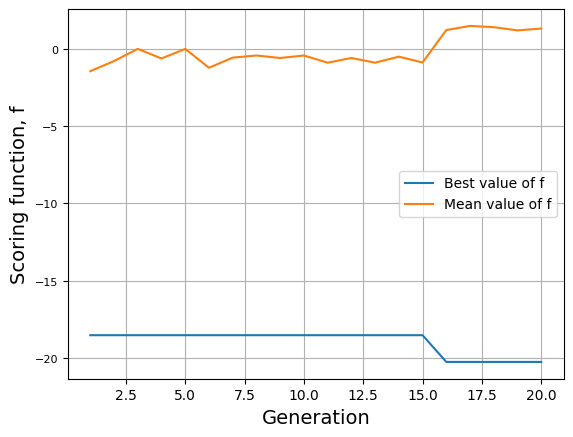

done!


Generating plot file: test_function.pdf...

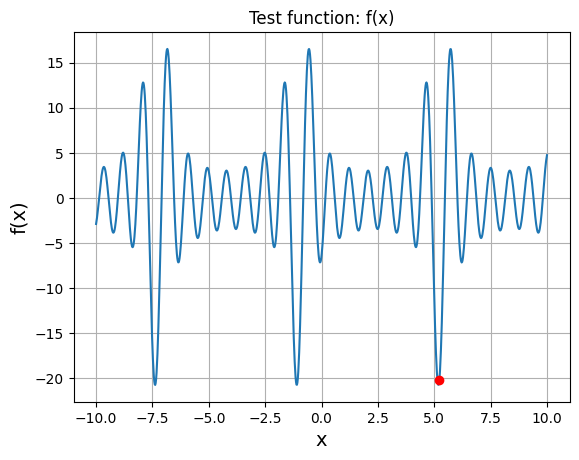

done!


In [1]:
#!/usr/bin/env python3
#
################################################################################
# Dr. Walter F. de Azevedo, Jr.                                                #
# [Scopus](https://www.scopus.com/authid/detail.uri?authorId=7006435557)       #
# [GitHub](https://github.com/azevedolab)                                      #
# January 12, 2025                                                             #
################################################################################
#
# Import section
import ast, csv, requests, sys, warnings
import numpy as np
from turtle import *
import matplotlib.pyplot as plt

# Ignore warnings
warnings.filterwarnings("ignore")

################################################################################
# Define Hexa() class
################################################################################
class Hexa(object):
    """Class to generate a random hexadecimal string. The string is intended
    to be used with Turtle library as color parameter."""
    # Define constructor method
    def __init__(self):
        # Generate pseudorandom number
        self.r = np.random.randint(0,256)
        self.g = np.random.randint(0,256)
        self.b = np.random.randint(0,256)

        # Some editing
        self.r_hex = str("0x%X" % self.r)
        self.g_hex = "0x%X" % self.g
        self.b_hex = "0x%X" % self.b
        self.rgb_hex = self.r_hex[1:]+self.g_hex[1:]+self.b_hex[1:]
        self.z = self.rgb_hex.replace("x","")
        self.my_string = str(self.z)
        self.my_hex_string = self.my_string.lower()

    # Define method to generate hex
    def gen_hex(self):
        """Method to generate a hex string"""
        # Loop while to make sure the string has 6 characters
        while len(self.my_hex_string) != 6:
            self.r = np.random.randint(0,256)
            self.g = np.random.randint(0,256)
            self.b = np.random.randint(0,256)
            self.r_hex = str("0x%X" % self.r)
            self.g_hex = "0x%X" % self.g
            self.b_hex = "0x%X" % self.b
            self.rgb_hex = self.r_hex[1:]+self.g_hex[1:]+self.b_hex[1:]
            self.z = self.rgb_hex.replace("x","")
            self.my_string = str(self.z)
            self.my_hex_string = self.my_string.lower()

################################################################################
# Define Function() class
################################################################################
class Function(object):
    """Class to calculate an one-variable mathematical function."""
    # Define constructor method
    def __init__(self,x,function_id,opt_problem):
        self.x = x                          # x float
        self.function_id = function_id      # Function id
        self.opt_problem = opt_problem      # Optimization problem

    # Definition of scoring_func()
    def scoring_func(self):
        """Method to calculate scoring function.
        Most of functions taken from
        https://infinity77.net/global_optimization/test_functions_1d.html.
        """
        # Define function
        if self.function_id == "01":
            f_calc = (np.sin(self.x))*self.x**2             # [0, 100]
        elif self.function_id == "02":
            f_calc = np.sin(self.x) + np.sin((10/3)*self.x) # [2.7, 7.5]
        elif self.function_id == "03":
            f_calc = 0
            for k in range(1,7):
                f_calc += k*( np.sin( (k + 1)*self.x + k))    # [-10,10]

        # Check the type of optimization problem
        if self.opt_problem == "minimization":
            f_calc = -f_calc    # For minimization problem, otherwise is a
                                # maximization problem

        return f_calc

################################################################################
# Define Touche() class
################################################################################
# Define a class
class Touche(object):
    """A class to draw an ellipse"""
    # Define constructor method
    def __init__(self,x,y,size_x,size_y,rotate, color,turtle_request):
        self.turtle_request = turtle_request # Define whether include turtle
                                            # evolution screen or not
        self.x = x                          # x coordinate in pixels
        self.y = y                          # y coordinate in pixels
        self.size_x = size_x                # Ellipse axis
        self.size_y = size_y                # Ellipse axis
        self.color = color                  # Filling color
        self.rotate = rotate                # Rotation

    # Define draw() method
    def draw(self):
        if self.turtle_request[0][0] == "on":
            self.wn = Screen()                  # Call screen with dimensions
                                                # 680 x 570 , 0,0 at the center
            self._ = Turtle()                   # Create a turtle self._
            self._.penup()                      # Move pen up
            self._.setx(self.x)                 # Set up initial position x
            self._.sety(self.y)                 # Set up initial position y
            self._.pendown()                    # Move pen down
            self._.shape("turtle")              # Draw a turtle
            #self._.right(self.x*45)            # Rotate an angle in degrees
            self._.right(self.rotate*45)
            self._.shapesize(self.size_x, self.size_y, 1)   # Define size
            self._.fillcolor(self.color)    # Define color '#ff ff ff' '#32c18f'
        else:
            pass

    # Define bye() method
    def bye(self):
        if self.turtle_request[0][0] == "on":
            self.wn.exitonclick()               # Close when mouse click
        else:
            pass

################################################################################
# Define GA() class
################################################################################
class GA(object):
    """A class to implement a simple GA"""
    # Constructor method
    def __init__(self,turtle_request,popsize,maxIterations,crossoverrate,
                 binarylength,mutationrate,f_min,f_max,conv_f,seed_in,
                 function_id,opt_problem):
        # Define atributes
        self.turtle_request=turtle_request, # Define whether include turtle
                                            # evolution screen or not
        self.popsize = popsize              # Population size
        self.maxIterations = maxIterations  # Number of iterations
        self.crossoverrate = crossoverrate  # Probability of crossover
        self.binarylength = binarylength    # Binary string length
        self.mutationrate = mutationrate    # Probability of mutation
        self.f_min = f_min                  # Minimum float
        self.f_max = f_max                  # Maximum float
        self.conv_f = conv_f                # Conversion factor
                                            # (scoring function to dimensions)
        self.seed_in = seed_in              # Seed for generation of random
                                            # numbers
        self.function_id = function_id      # Function id
        self.opt_problem = opt_problem      # Optimization problem

    # __str__ method
    def __str__(self):
        info = "GA class\n"
        info += "Class to generate a model based on a simple genetic "
        info == "algorithm.\n"
        info += "It is an OOP implementation of a genetic algorithm partially "
        info += "based on\n"
        info += "the algorithm 3 from Coley, 1999.\n"
        info += "Reference\n"
        info += " Coley, David A. An Introduction to Genetic Algorithms for "
        info += "Scientists and Engineers.\n"
        info += "Singapore: World Scientific Publishing Co. Pte. Ltd., 1999. "
        info += "227 pp."

        return info

    # Definition of get_max()
    def get_max(self,x):
        """Method to return the maximum value for an array"""
        # Find maximum
        max1 = np.max(x)

        return max1

    # Definition of get_min()
    def get_min(self,x):
        """Method to return the minimum value for an array"""
        # Find minimum
        min1 = np.min(x)

        return min1

    # Definition of get_mean() f
    def get_mean(self,x):
        """Method to return the mean value for an array"""
        # Find mean value
        mean1 = np.mean(x)

        return mean1

    # Definition of gen_bin_string_seed()
    def gen_bin_string_seed(self):
        """Method to generate binary strings"""
        # Set up seed for random number
        np.random.seed(self.seed_in)

        # Set up arrays of zeros
        self.best_array = np.zeros(self.maxIterations)
        self.mean_array = np.zeros(self.maxIterations)

        # Set up empty list
        bin_str_list = []

        # Generate binary string
        for i in range(self.popsize):
            bin1 = np.random.randint(2,size=self.binarylength) # Binary string
                                                               # length
            bin_str0 = str(bin1).replace(" ","").replace("[","").replace("]","")
            bin_str_list.append(bin_str0)

        # Update population
        self.current_pop = bin_str_list

        print("\nInitial Population")
        # Looping through initial population
        for bin_string in self.current_pop:
            print(bin_string)

    # Definition of bin2dec()
    def bin2dec(self,string_num):
        """Method to convert binary string to decimal integer"""
        # Convert binary to decimal
        num1 = str(int(string_num,2))

        return num1

    # Definition of bin2dec_array()
    def bin2dec_array(self,my_pop_in):
        """Method to convert a list of binary strings to an array of integer
        decimals"""
        # Set up an array of zeros with self.popsize elements
        x = np.zeros(self.popsize)

        # Looping through population to convert from binary to an array of
        # decimals
        i = 0
        for line in my_pop_in:
            aux = self.bin2dec(line)
            x[i] = aux
            i+=1

        return x

    # Definition of shuffle()
    def shuffle(self,pop_in):
        """Method to shuffle population"""
        # Shuffle by calling random.shuffle()
        np.random.shuffle(pop_in)

        return pop_in

    # Definition of gen_offspring method
    def gen_offsprings(self,str1,str2):
        """Method to generate offsprings"""
        # Define partition locus
        locus = np.random.randint(2,len(str1)-1)

        # Generate offspring
        offspring1 = str1[0:locus] + str2[locus:]
        offspring2 = str2[0:locus] + str1[locus:]

        return offspring1, offspring2

    # Definition of single_point_crossover
    def single_point_crossover(self,new_pop_in):
        """Method to update population after crossover"""
        # Assign population to count_pop.
        # This population size is less than self.popsize
        count_pop = 0

        # Loop while to generate new population with offspring
        while count_pop < self.popsize:    # To make sure the size of
                                            # population stay the same
            # Get random number
            r_n = np.random.uniform(0,1)

            # Test cross over prob
            if float(self.crossoverrate) < r_n:
                # Loop for to generate offspring (gen_offsprings())
                for i in range(int(self.popsize/2)):
                    o1,o2 = self.gen_offsprings(new_pop_in[i],new_pop_in[i+1])
                    new_pop_in.append(o1)
                    new_pop_in.append(o2)
                    count_pop += 2

            # Get random number
            r_n = np.random.uniform(0,1)

        # Assign new population to self.current_pop
        self.current_pop = new_pop_in

    # Definition of int2float()
    def int2float(self,i):
        """Method to convert integer to float"""

        f = self.f_min + i*(self.f_max - self.f_min)/(2**(self.binarylength) -1)

        return f

    # Definition of roulette wheel as shown in the Algorithm 2 from Coley 1999
    def roulette_wheel(self):
        """Method for application of roulette wheel to a population."""
        # Sum scoring function vaules
        score_sum = np.sum(self.score)

        # Set up empty list
        new_pop = []

        # Looping through all individuals
        for j in range(self.popsize):
            # Generate random number
            rs =np.random.uniform(0,score_sum)

            # Set up initial value for score_partial
            score_partial = 0

            # Looping through inidividual until score_partial > rs
            for i in range(self.popsize):
                score_partial += self.score[i]

                # Check if condition is satisfied
                if score_partial > rs:
                    new_pop.append(self.current_pop[i])
                    break

        # Update population
        self.current_pop = new_pop

    # Definition of elitism method
    def elitism(self):
        """Method for elitism"""
        # Call bin2dec_array()
        dec = self.bin2dec_array(self.current_pop)

        # Call int2float()
        my_float = self.int2float(dec)

        # Instantiating an object of the Function() class and assigns it to the
        # variable score0
        score0 = Function(my_float,self.function_id,self.opt_problem)

        # Invoking the scoring_funct() method
        my_score = score0.scoring_func()

        # Set up an array
        my_array = np.array(my_score)

        # Find the maximum for the scoring function and assigns it to max_score
        max_score = np.max(my_array)

        # Set up an empty list
        new_pop = []

        # Find the position for the max_score in the my_array
        pos_array = np.where( my_array == max_score)

        # Get the integer for index
        my_index = int(pos_array[0][0])

        # Assign elite member to self.elite
        self.elite = self.current_pop[my_index]

        # Show elite member
        print("Elite member: ", self.elite,"  %.3f"%max_score)

    # Include elite member in the population
    def include_elite(self):
        """Method to include elite member in the current population."""
        # Generate random number
        rs = np.random.randint(0,self.popsize)

        # Set up empty list
        new_pop = []

        # Looping through population and change for elite meber at random
        # position
        for i in range(self.popsize):
            if i != rs:
                new_pop.append(self.current_pop[i])
            else:
                new_pop.append(self.elite)

        # Update current_pop
        self.current_pop = new_pop

    # Definition of selection_Coley_algo_03() (selection operator)
    def selection_Coley_algo_03(self):
        """Method for selection operator using aklgorithm 2 from Coley 1999."""
        # Call bin2dec_array()
        dec = self.bin2dec_array(self.current_pop)

        # Call int2float()
        my_float = self.int2float(dec)

        # Instantiating an object of the Function() class and assigns it to the
        # variable score1
        score1 = Function(my_float,self.function_id,self.opt_problem)

        # Invoking the scoring_funct() method
        self.score = score1.scoring_func()

        # Call elitism
        self.elitism()

        # Call roulette_wheel()
        self.roulette_wheel()

    # Definition of cross_over
    def crossover_Coley_algo_03(self):
        """Method to apply crossover operator to a population."""
        # Call shuffle()
        self.current_pop = self.shuffle(self.current_pop)

        # Call single_point_crossover
        self.single_point_crossover(self.current_pop)

    # Definition of mutation_Coley_algo_03 method
    def mutation_Coley_algo_03(self):
        """Method to apply mutation_Coley_algo_03 operator"""
        # Determine total
        total = self.popsize*self.binarylength

        # Some editing list-> string
        str_pop = "".join(self.current_pop)
        str_pop = str_pop.replace("\n","")

        # Set up empty string
        str_pop_out = ""

        # Carry out mutation
        for i in range(total):
            if i == int(1/self.mutationrate):
                if str_pop[i] == 1:
                    str_pop_out+="0"
                else:
                    str_pop_out+="1"
            else:
                str_pop_out+=str_pop[i]

        # Back to string. Set up empty list
        pop = []

        # Loop to recover population after mutation_Coley_algo_03
        for i in range(self.popsize):
            aux = ""
            for j in range(self.binarylength):
                aux += str_pop_out[i+j]
            pop.append(aux)

        self.current_pop = pop

    # Definition of show_pop()
    def show_pop(self,string2show,pop2show,f_in,function_in,gen_in):
        """Method to show population"""
        # Show information concerning the population
        print("\n"+string2show)

        # Looping though the elements of the population
        for i in range(len(pop2show)):
            if self.opt_problem == "minimization":
                print(pop2show[i],"  %.3f"%f_in[i],"  %.3f"%-function_in[i])
                opt_i = np.argmin(-function_in)
            else:
                print(pop2show[i],"  %.3f"%f_in[i],"  %.3f"%function_in[i])
                opt_i = np.argmax(function_in)

        # Show best solution
        self.x_best = f_in[opt_i]
        self.f_best = -function_in[opt_i]
        x_best_string = str("%.3f"%self.x_best)
        f_best_string = str("%.3f"%(self.f_best))
        msg_out = "\nBest solution (generation "+gen_in+"): x = "
        msg_out += x_best_string+", f(x) = "+f_best_string
        print(msg_out)

    # Definition of plot_ga_evolution() method
    def plot_ga_evolution(self,x_label,y_label,legend1,legend2,file_out,
            xlabel_fontsize,ylabel_fontsize,xtick_fontsize,ytick_fontsize,dpi):
        """Method to generate a plot of the evolution of the scoring function
        values for each iteraction."""
        # Show message
        msg_out = "\n\nGenerating plot file: "+file_out
        print(msg_out,end = "...")

        # Generate array for x-axis
        x = np.linspace(1,self.maxIterations,self.maxIterations)

        # Generate plot
        plt.plot(x,self.best_array,label=legend1)
        plt.plot(x,self.mean_array,label=legend2)
        plt.legend(loc = "best")
        plt.xlabel(x_label,fontsize = xlabel_fontsize)
        plt.ylabel(y_label,fontsize = ylabel_fontsize)
        plt.xticks(fontsize = xtick_fontsize, rotation = 0)
        plt.yticks(fontsize = ytick_fontsize, rotation = 0)
        plt.grid(True)
        plt.show()
        plt.savefig(file_out,dpi = dpi)
        plt.close()
        print("done!")

    # Define plot_test_func() method
    def plot_test_func(self,plt_title,min_x,max_x,x_label,y_label,file_out,
            xlabel_fontsize,ylabel_fontsize,xtick_fontsize,ytick_fontsize,dpi):
        """Method to generate a plot for the one-variable test function."""
        # Show message
        msg_out = "\n\nGenerating plot file: "+file_out
        print(msg_out,end = "...")

        # Define x range with linspace
        x = np.linspace(min_x, max_x, 1000)

        # Define function
        if self.function_id == "01":
            f = (np.sin(x))*x**2  # [0, 100]    conv_factor = 0.0005 max = 96.1
        elif self.function_id == "02":
            f = np.sin(x) + np.sin((10/3)*x) # [2.7, 7.5]
        elif self.function_id == "03":
            f = 0
            for k in range(1,7):
                f += k*(np.sin( (k + 1)*x + k))    # [-10,10]

        # Create plot
        plt.plot(x,f)
        plt.plot(self.x_best,self.f_best,'o',color="red")   # Plot best point
        plt.xlabel(x_label,fontsize=xlabel_fontsize)        # Add axis label
        plt.ylabel(y_label,fontsize=ylabel_fontsize)        # Add axis label
        plt.title(plt_title)                                # Add title
        plt.xticks(fontsize = xtick_fontsize, rotation = 0) # Define tick size
        plt.yticks(fontsize = ytick_fontsize, rotation = 0) # Define tick size
        plt.grid(True)                                      # Add grid to plot
        plt.show()
        plt.savefig(file_out,dpi=dpi)
        plt.close()
        print("done!")

    # Definition of coley_algo_03 method
    def coley_algo_03(self):
        """Method to implement a genetic algorithm partially based on the
        algorithm 3 from Coley 1999"""
        # General parameters for the turtles
        x_min = -240        # Minimum x coordinate in pixels
        x_max =  240        # Maximum x coordinate in pixels
        y_min = -240        # Minimum y coordinate in pixels
        y_max =  240        # Maximum y coordinate in pixels
        max_rotate = 8      # Maximum rotation angle 8*45 degrees

        # Call gen_bin_string_seed()
        self.gen_bin_string_seed()

        # Looping through the number of iteractions
        for i in range(self.maxIterations):

            # Call selection_Coley_algo_03()
            self.selection_Coley_algo_03()

            # Call crossover_Coley_algo_03() method
            self.crossover_Coley_algo_03()

            # Call mutation_Coley_algo_03 method
            self.mutation_Coley_algo_03()

            # Call include_elite
            self.include_elite()

            # Call bin2dec_array()
            dec = self.bin2dec_array(self.current_pop)

            # Call int2float()
            my_float = self.int2float(dec)

            # Instantiating an object of the Function() class and
            # assigns it to the variable score2
            score2 = Function(my_float,self.function_id,self.opt_problem)

            # Invoking the scoring_funct() method
            scoring = score2.scoring_func()

            # Call show_pop()
            gen_in = str(i+1)
            self.show_pop("\nPopulation for generation "+gen_in,
                                    self.current_pop,my_float,scoring,gen_in)

            # Add best soluction for this iteration (see show_pop() method)
            self.best_array[i] = self.f_best

            # Instantiating an object of the Hexa() class and
            # assigns it to the variable h1
            h1 = Hexa()                              # String for hexadecimal

            # Invoking the method gen_hex()
            h1.gen_hex()
            hex = h1.my_hex_string

            # Looping through all elements (for turtles)
            for j in range(self.popsize):
                # Define parameters for each turtle
                x = np.random.randint(x_min,x_max)          # x in pixels
                y = np.random.randint(y_min,y_max)          # y in pixels
                length  = scoring[j]*self.conv_f            # Turtle length
                width = scoring[j]*self.conv_f              # Turtle width
                rotate = np.random.randint(0,max_rotate)    # Rotation angle
                                                            # 8*45 degrees

                # Instantiating an object of the Touche() class and
                # assigns it to the variable t
                t = Touche(x, y, length, width, rotate, "#"+hex,
                                                            self.turtle_request)

                # Invoking the method draw()
                t.draw()

            # Call get_mean()
            self.mean_array[i] = self.get_mean(scoring)

        # Invoking the method bye()
        t.bye()

        # Call show_pop()
        self.show_pop("\nFinal Population",self.current_pop,my_float,scoring,
                                                                    str(i+1))

################################################################################
# Define main() function
################################################################################
def main():
    # Url with dictionaries
    # Define Google Drive variables
    drvstr1 = "https://drive.usercontent.google.com/u/0/uc?id="
    drvstr2 = "&export=download"
    id = "1jaxkJ3k5GDJ7vKw9cXldaTn71vpGbytI"     # Drive id for a file
    dict_url =  drvstr1+id+drvstr2               # Url
    file4dict = "darwin.in"                      # Input with dictionaries

    # Handle dictonaries
    # Download a file from web
    print("\nDownloading file: "+file4dict,end="...")
    dict_r = requests.get(dict_url, allow_redirects=True)
    open(file4dict, "wb").write(dict_r.content)
    print("done!")

    # Open dictionary
    file4dict = "darwin.in"
    with open(file4dict) as f:
        data_in = f.read()

    # Reconstructing the data_in as a dictionary
    dict = ast.literal_eval(data_in)

    # Get GA parameters
    ga_key = "ga_par"
    ga_par = dict.get(ga_key)                    # Get GA parameters
    popsize = ga_par["popsize"]                  # Population size
    maxIterations = ga_par["maxIterations"]      # Maximum number of iterations
    crossoverrate = ga_par["crossoverrate"]      # Probability of crossover
    binarylength = ga_par["binarylength"]        # Binary string length
    mutationrate = ga_par["mutationrate"]        # Probability of mutation
    seed = ga_par["seed"]                        # Random seed

    # Get function data
    function_key = "fun_par"
    function_par = dict.get(function_key)        # Get function dictionary
    function_id = function_par["function_id"]    # Function id
    opt_problem = function_par["opt_problem"]    # Optimization problem
    min_x = function_par["min_x"]                # Minimum value for x
    max_x = function_par["max_x"]                # Maximum value for x
    conv_factor = function_par["conv_factor"]    # Convertion factor for turtle
                                                 # plotting

    # Get plot parameters
    plt_key = "plt_par"
    plt_par = dict.get(plt_key)                  # Get plot parameters
    turtle_request = plt_par["turtle_request"],  # Define whether include turtle
                                                 # evolution screen or not
    x_label = plt_par["x_label"]                 # x axis label
    y_label = plt_par["y_label"]                 # y axis label
    legend1 = plt_par["legend1"]                 # Plot legend 1
    legend2 = plt_par["legend2"]                 # Plot legend 2
    file_out = plt_par["file_out"]               # Plot file name
    xlabel_fontsize = plt_par["xlabel_fontsize"] # Font size for x label
    ylabel_fontsize = plt_par["ylabel_fontsize"] # Font size for y label
    xtick_fontsize = plt_par["xtick_fontsize"]   # x tick font size
    ytick_fontsize = plt_par["ytick_fontsize"]   # y tick font size
    dpi = plt_par["dpi"]                         # Plot resolution

    # Get test function parameters
    test_key = "test_par"
    test_par = dict.get(test_key)                # Get test function parameters
    t_x_label = test_par["x_label"]              # x axis label
    t_y_label = test_par["y_label"]              # y axis label
    t_plt_title = test_par["plt_title"]          # Plot title
    t_file_out = test_par["file_out"]            # Plot file name
    t_xlabel_fontsize = test_par["xlabel_fontsize"] # Font size for x label
    t_ylabel_fontsize = test_par["ylabel_fontsize"] # Font size for y label
    t_xtick_fontsize = test_par["xtick_fontsize"]   # x tick font size
    t_ytick_fontsize = test_par["ytick_fontsize"]   # y tick font size
    t_dpi = test_par["dpi"]                      # Plot resolution

    # Instantiating an object of the GA() class and
    # assigns it to the variable p1
    p1 = GA(turtle_request,popsize,maxIterations,crossoverrate,binarylength,
            mutationrate,min_x,max_x,conv_factor,seed,function_id,opt_problem)

    # Invoking coley_algo_03() method
    p1.coley_algo_03()

    # Invoking plot_ga_evolution() method
    p1.plot_ga_evolution(x_label,y_label,legend1,legend2,file_out,
            xlabel_fontsize,ylabel_fontsize,xtick_fontsize,ytick_fontsize,dpi)

    # Invoking plot_test_func() method
    p1.plot_test_func(t_plt_title,min_x,max_x,t_x_label,t_y_label,t_file_out,
    t_xlabel_fontsize,t_ylabel_fontsize,t_xtick_fontsize,t_ytick_fontsize,t_dpi)

# Call main() function
main()